# HW1
* Name: Yongjin Choi
* EID: yc29276

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit

## Problem 1-3

Define a class that returns `W` values corresponding to `t` values with defined `A` and `tau` values.

In [29]:
class W:
    def __init__(self, A, tau):
        self.A = A
        self.tau = tau
        
    def Wt(self, t1=0, t2=2.1, interval=0.1):
        t_values = np.arange(t1, t2, interval)
        Wts = []
        for t in t_values:
            Wt = self.A*(math.exp(-t/self.tau) - 1 + t/self.tau)
            Wts.append(Wt)
        return t_values, Wts

#### Problem 1

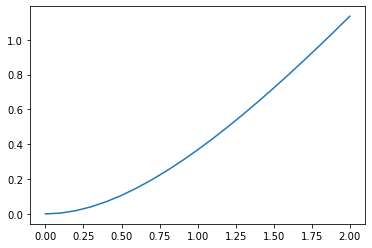

In [30]:
W1 = W(A=1, tau=1)
t1, w1 = W1.Wt()
plt.plot(t1, w1)

#### Problem 2-3

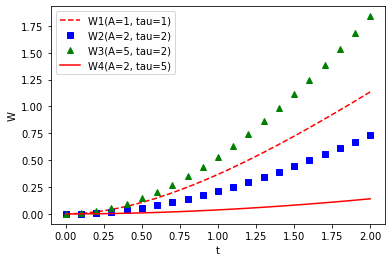

In [31]:
W1 = W(A=1, tau=1)
W2 = W(A=2, tau=2)
W3 = W(A=5, tau=2)
W4 = W(A=2, tau=5)

t1, w1 = W1.Wt()
t2, w2 = W2.Wt()
t3, w3 = W3.Wt()
t4, w4 = W4.Wt()

plt.plot(t1, w1, 'r--', t2, w2, 'bs', t3, w3, 'g^', t4, w4, 'r-')
plt.legend(['W1(A=1, tau=1)','W2(A=2, tau=2)','W3(A=5, tau=2)','W4(A=2, tau=5)'])
plt.xlabel('t')
plt.ylabel('W')
plt.show()

**Problem 4**

In [40]:
# Read data from the existing directory
current_dir = os.path.abspath(os.getcwd())
data_name = "wt.csv"
data_dir = os.path.join(current_dir, data_name)
df_w = pd.read_csv(data_dir, header = None)
df_w.columns = ['t', 'W']
df_w.head(10)

,t,W
0,2.3832,0.010900
1,2.7230,0.009343
2,3.0358,0.014600
3,3.5177,0.014500
4,4.0014,0.024200
5,4.5692,0.028600
6,5.0528,0.037600
7,5.5358,0.043500
8,6.4458,0.059200
9,7.5262,0.076400


In [41]:
def W_p4(t, A, tau):
    return A*(math.exp(-t/tau) - 1 + t/tau)
Wp5 = np.vectorize(Wp4)

popt, pcov = curve_fit(Wp5, df_w['t'].to_numpy(), df_w['W'].to_numpy(), p0=[1, 1])

A = popt[0]
tau = popt[1]

Text(0, 0.5, 'W')

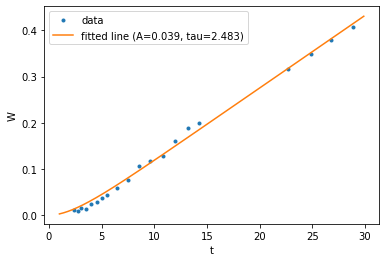

In [42]:
t2 = np.arange(1, 30, 0.1)
W_fit = Wp5(t2, A = popt[0], tau = popt[1])

plt.figure()
plt.plot(df_w['t'], df_w['W'], '.')
plt.plot(t2, W_fit)
plt.legend(['data', f'fitted line (A={popt[0]:.3f}, tau={popt[1]:.3f})'])
plt.xlabel('t')
plt.ylabel('W')